## Question to Answer
> Which target city has the best profit potential? <br>
>> What is the differential between rent & mortage? <br>
>> Where has growth been the best? <br>
Bonus: Will property taxes make greater impact on profit in one city vs. another?
## Approach
1. Identify factors / Select data: Monthly Rental $, Monthly Mortage $; Bonus: Property Tax Rates & Property Values
2. Identify data source: Census Python Module **API**: https://www.census.gov/data/developers/guidance/api-user-guide.html
3. Collect data: monthly rates ~~2020-2022~~ 2019-2021
4. Analyze data: 
> a. calculate annual % changes <br> 
> b. create bar charts <br> 
> c. use statistics to verify significance <br> 
## Analysis Summary
...
 - ...
 - ...

In [2]:
# Dependencies & setup

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
from scipy import stats
from census import Census
from config import census_key

# Create an instance of the Census library
# By default, the year for a dataset is the most recent year available.

# Target cities: Austin, Chicago, Denver, Memphis, New York, San Francisco
city_list_str = "04384, 16264, 23527, 56116, 63217, 78904"

# This notebook focuses on rent: Median Contract Rent(B25058_001E), Median Gross Rent (B25064_001E), Median Home Value (B25077_001E), Median Monthly Owner Costs (B25088_002E)
# Median gross rent = contract rent plus the cost of utilities
# Median value (dollars) = Owner-Occupied housing units
# Median Monthly Owner Costs (Dollars) by  Mortgage Status
var_list = ("B25058_001E", "B25064_001E", "B25077_001E", "B25088_002E")

# Define function to gather data from the census API
def urban_req(yr, var_list, loc_str):
    c = Census(census_key, year = yr)
    data = c.acs.get(var_list, {"for": "urban area:"+loc_str})
    return(data)

# Define function for converting data into dataframe
def urban_df(yr, data):
    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Column renaming
    df = df.rename(columns = {"B25058_001E":str(yr)+" Median Contract Rent", "B25064_001E":str(yr)+" Median Gross Rent","urban area": "City ID",
                              "B25077_001E":str(yr)+" Median Home Value", "B25088_002E":str(yr)+" Median Monthly Owner Costs","urban area": "City ID"})

    # Converting to numbers
    df[str(yr)+" Median Contract Rent"] = df[str(yr)+" Median Contract Rent"].astype(float)
    df[str(yr)+" Median Gross Rent"] = df[str(yr)+" Median Gross Rent"].astype(float)
    df[str(yr)+" Median Home Value"] = df[str(yr)+" Median Home Value"].astype(float)
    df[str(yr)+" Median Monthly Owner Costs"] = df[str(yr)+" Median Monthly Owner Costs"].astype(float)
    return df

In [3]:
# Create an instance of the Census library to get 2019 data
census_data_19 = urban_req(2019, var_list, city_list_str)

In [4]:
# 2019 Convert to DataFrame
census_pd_19 = urban_df(2019, census_data_19)
census_pd_19.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID
0,1792.0,1887.0,883600.0,3129.0,78904
1,1322.0,1439.0,454000.0,2813.0,63217
2,724.0,943.0,146700.0,1314.0,56116
3,983.0,1131.0,245300.0,1914.0,16264
4,1273.0,1380.0,371200.0,1836.0,23527


In [5]:
# Create an instance of the Census library to get 2020 data
census_data_20 = urban_req(2020, var_list, city_list_str)

In [6]:
# 2020 Convert to DataFrame
census_pd_20 = urban_df(2020, census_data_20)
census_pd_20.head()

,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,City ID
0,1024.0,1165.0,253300.0,1934.0,16264
1,1363.0,1483.0,468900.0,2836.0,63217
2,1897.0,1999.0,935500.0,3250.0,78904
3,1198.0,1356.0,314100.0,1999.0,04384
4,1342.0,1446.0,399500.0,1916.0,23527


In [7]:
# Create an instance of the Census library to get 2021 data
census_data_21 = urban_req(2021, var_list, city_list_str)

In [8]:
# 2021 Convert to DataFrame
census_pd_21 = urban_df(2021, census_data_21)
census_pd_21.head()

,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs,City ID
0,1269.0,1424.0,337900.0,2121.0,04384
1,1085.0,1220.0,264200.0,2008.0,16264
2,1432.0,1553.0,431200.0,2049.0,23527
3,781.0,1014.0,165900.0,1389.0,56116
4,1438.0,1573.0,486900.0,2942.0,63217


In [9]:
# Merge 2019 and 2020 data
rent_2019_2020 = pd.merge(census_pd_19, census_pd_20, on="City ID", how="outer")
rent_2019_2020.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs
0,1792.0,1887.0,883600.0,3129.0,78904,1897.0,1999.0,935500.0,3250.0
1,1322.0,1439.0,454000.0,2813.0,63217,1363.0,1483.0,468900.0,2836.0
2,724.0,943.0,146700.0,1314.0,56116,741.0,957.0,155100.0,1339.0
3,983.0,1131.0,245300.0,1914.0,16264,1024.0,1165.0,253300.0,1934.0
4,1273.0,1380.0,371200.0,1836.0,23527,1342.0,1446.0,399500.0,1916.0


In [19]:
# Merge 2019_2020 and 2021 data
rent_19_20_21 = pd.merge(rent_2019_2020, census_pd_21, on="City ID", how="outer")

# Clean up data frame and set city name as index
rent_19_20_21["City"]=["San Francisco", "New York", "Memphis", "Denver", "Chicago", "Austin"]
rent_19_20_21 = rent_19_20_21.drop("City ID", axis = 1)
rent_19_20_21 = rent_19_20_21.sort_values("City", ascending=True)
rent_19_20_21 = rent_19_20_21.set_index("City")

# Save to csv to have data without re-making API calls if necessary
rent_file = Path("resources/rent_mortgage.csv")
rent_19_20_21.to_csv(rent_file)

rent_19_20_21

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs
City,,,,,,,,,,,,
Austin,1152.0,1302.0,290300.0,1929.0,1198.0,1356.0,314100.0,1999.0,1269.0,1424.0,337900.0,2121.0
Chicago,1273.0,1380.0,371200.0,1836.0,1342.0,1446.0,399500.0,1916.0,1432.0,1553.0,431200.0,2049.0
Denver,983.0,1131.0,245300.0,1914.0,1024.0,1165.0,253300.0,1934.0,1085.0,1220.0,264200.0,2008.0
Memphis,724.0,943.0,146700.0,1314.0,741.0,957.0,155100.0,1339.0,781.0,1014.0,165900.0,1389.0
New York,1322.0,1439.0,454000.0,2813.0,1363.0,1483.0,468900.0,2836.0,1438.0,1573.0,486900.0,2942.0
San Francisco,1792.0,1887.0,883600.0,3129.0,1897.0,1999.0,935500.0,3250.0,2007.0,2134.0,983100.0,3437.0


In [20]:
# Calculate annual changes and create new dataframe

conrent_19_20_chng = 100*(rent_19_20_21["2020 Median Contract Rent"]-rent_19_20_21["2019 Median Contract Rent"])/rent_19_20_21["2019 Median Contract Rent"]
conrent_20_21_chng = 100*(rent_19_20_21["2021 Median Contract Rent"]-rent_19_20_21["2020 Median Contract Rent"])/rent_19_20_21["2020 Median Contract Rent"]
conrent_19_21_chng = 100*(rent_19_20_21["2021 Median Contract Rent"]-rent_19_20_21["2019 Median Contract Rent"])/rent_19_20_21["2019 Median Contract Rent"]

grsrent_19_20_chng = 100*(rent_19_20_21["2020 Median Gross Rent"]-rent_19_20_21["2019 Median Gross Rent"])/rent_19_20_21["2019 Median Gross Rent"]
grsrent_20_21_chng = 100*(rent_19_20_21["2021 Median Gross Rent"]-rent_19_20_21["2020 Median Gross Rent"])/rent_19_20_21["2020 Median Gross Rent"]
grsrent_19_21_chng = 100*(rent_19_20_21["2021 Median Gross Rent"]-rent_19_20_21["2019 Median Gross Rent"])/rent_19_20_21["2019 Median Gross Rent"]

homeval_19_20_chng = 100*(rent_19_20_21["2020 Median Home Value"]-rent_19_20_21["2019 Median Home Value"])/rent_19_20_21["2019 Median Home Value"]
homeval_20_21_chng = 100*(rent_19_20_21["2021 Median Home Value"]-rent_19_20_21["2020 Median Home Value"])/rent_19_20_21["2020 Median Home Value"]
homeval_19_21_chng = 100*(rent_19_20_21["2021 Median Home Value"]-rent_19_20_21["2019 Median Home Value"])/rent_19_20_21["2019 Median Home Value"]

moncost_19_20_chng = 100*(rent_19_20_21["2020 Median Monthly Owner Costs"]-rent_19_20_21["2019 Median Monthly Owner Costs"])/rent_19_20_21["2019 Median Monthly Owner Costs"]
moncost_20_21_chng = 100*(rent_19_20_21["2021 Median Monthly Owner Costs"]-rent_19_20_21["2020 Median Monthly Owner Costs"])/rent_19_20_21["2020 Median Monthly Owner Costs"]
moncost_19_21_chng = 100*(rent_19_20_21["2021 Median Monthly Owner Costs"]-rent_19_20_21["2019 Median Monthly Owner Costs"])/rent_19_20_21["2019 Median Monthly Owner Costs"]

change_df = pd.DataFrame({"2019-20 Contract Rent Change":conrent_19_20_chng, "2020-21 Contract Rent Change":conrent_20_21_chng, "2019-21 Contract Rent Change":conrent_19_21_chng, 
             "2019-20 Gross Rent Change":grsrent_19_20_chng, "2020-21 Gross Rent Change":grsrent_20_21_chng, "2019-21 Gross Rent Change":grsrent_19_21_chng, 
             "2019-20 Home Value Change":homeval_19_20_chng, "2020-21 Home Value Change":homeval_20_21_chng, "2019-21 Home Value Change":homeval_19_21_chng, 
             "2019-20 Mo Owner Cost Change":moncost_19_20_chng, "2020-21 Mo Owner Cost Change":moncost_20_21_chng, "2019-21 Mo Owner Cost Change":moncost_19_21_chng,})

# Save to csv to have data without re-making API calls if necessary
chng_file = Path("resources/rent_mortgage_perc_chng.csv")
rent_19_20_21.to_csv(chng_file)

change_df

,2019-20 Contract Rent Change,2020-21 Contract Rent Change,2019-21 Contract Rent Change,2019-20 Gross Rent Change,2020-21 Gross Rent Change,2019-21 Gross Rent Change,2019-20 Home Value Change,2020-21 Home Value Change,2019-21 Home Value Change,2019-20 Mo Owner Cost Change,2020-21 Mo Owner Cost Change,2019-21 Mo Owner Cost Change
City,,,,,,,,,,,,
Austin,3.993056,5.926544,10.156250,4.147465,5.014749,9.370200,8.198415,7.577205,16.396831,3.628823,6.103052,9.953344
Chicago,5.420267,6.706408,12.490181,4.782609,7.399723,12.536232,7.623922,7.934919,16.163793,4.357298,6.941545,11.601307
Denver,4.170905,5.957031,10.376399,3.006189,4.721030,7.869142,3.261313,4.303198,7.704851,1.044932,3.826267,4.911181
Memphis,2.348066,5.398111,7.872928,1.484624,5.956113,7.529162,5.725971,6.963250,13.087935,1.902588,3.734130,5.707763
New York,3.101362,5.502568,8.774584,3.057679,6.068780,9.312022,3.281938,3.838772,7.246696,0.817632,3.737659,4.585851
San Francisco,5.859375,5.798629,11.997768,5.935347,6.753377,13.089560,5.873699,5.088188,11.260751,3.867050,5.753846,9.843400


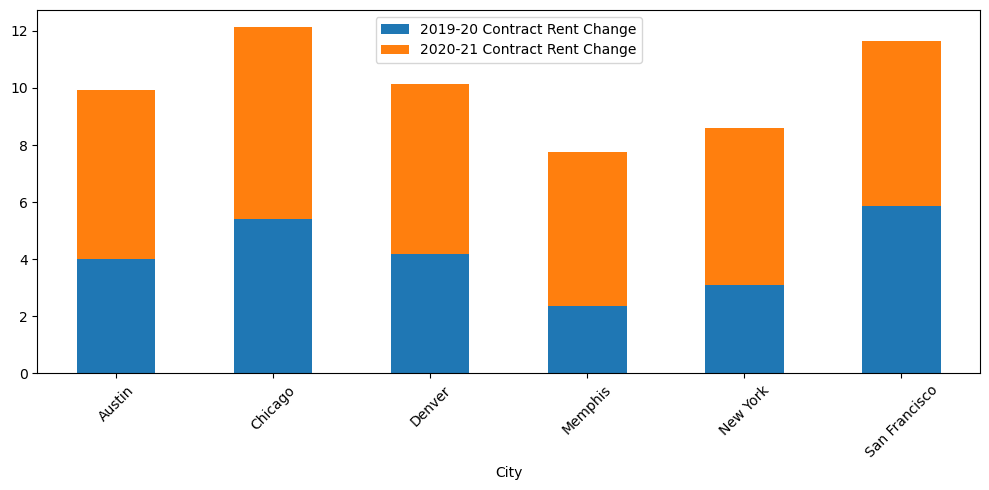

In [18]:
conren_change = change_df[["2019-20 Contract Rent Change", "2020-21 Contract Rent Change"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = conren_change.plot(kind="bar", figsize=(10,5), stacked=True)

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(conren_change.index, rotation=45)

plt.tight_layout()
plt.show()

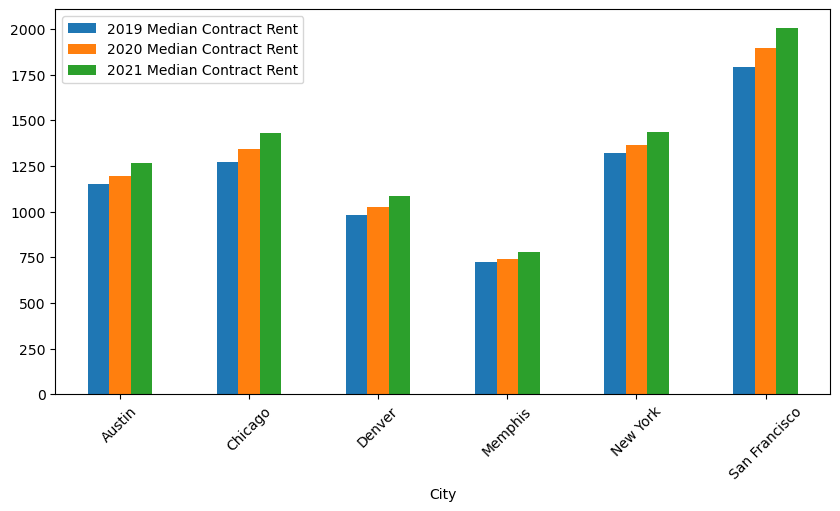

<Figure size 640x480 with 0 Axes>

In [26]:
con_rent_all = rent_19_20_21[["2019 Median Contract Rent", "2020 Median Contract Rent", "2021 Median Contract Rent"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = con_rent_all.plot(kind="bar", figsize=(10,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(con_rent_all.index, rotation=45)

plt.show()
plt.tight_layout()

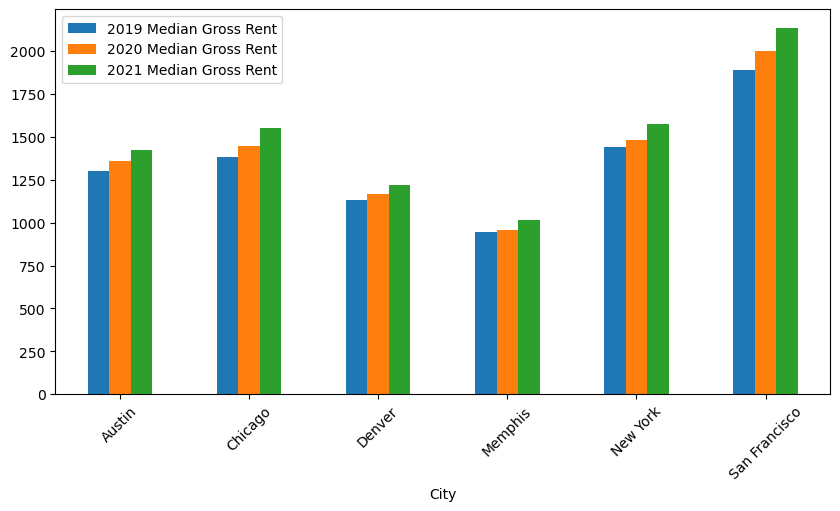

<Figure size 640x480 with 0 Axes>

In [27]:
grs_rent_all = rent_19_20_21[["2019 Median Gross Rent", "2020 Median Gross Rent", "2021 Median Gross Rent"]]

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = grs_rent_all.plot(kind="bar", figsize=(10,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(grs_rent_all.index, rotation=45)

plt.show()
plt.tight_layout()

In [ ]:
# Set x axis, tick locations, figure size
x_axis = range(0,3)
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.xticks(tick_locations, rent_19_20_21.index, rotation="vertical")

# Set labels
plt.title("2019-2021 Job Opening Rate Trends")
plt.xlabel("Month")
plt.ylabel("Job Opening Rate (%)")

In [22]:
x_axis = range(0,3)
x_axis

range(0, 3)

In [ ]:
# Try doing an all to get top?
c = Census(census_key, year = 2020)
census_data_20 = c.acs1.get(("B25058_001E", "B25064_001E" ), {"for": "urban area:*"})
census_data_20

In [ ]:
# Notes for using census python library

# https://www.census.gov/data/developers/data-sets/acs-1year.html

# This notebook focuses on rent: Median Contract Rent(B25058_001E), Median Gross Rent (B25064_001E), Median Home Value (B25077_001E), Median Monthly Owner Costs (B25088_002E)
# Median gross rent = contract rent plus the cost of utilities
# Median value (dollars) = Owner-Occupied housing units
# Median onthly Owner Costs (Dollars) by  Mortgage Status

# urban area	400   https://api.census.gov/data/2021/acs/acsse?get=NAME,K200101_001E&for=urban%20area:*   39
# ["Austin, TX Urbanized Area (2010)","1653539","04384"]
# ["Chicago, IL--IN Urbanized Area (2010)","8636074","16264"],
# ["Denver--Aurora, CO Urbanized Area (2010)","2690882","23527"],
# ["Memphis, TN--MS--AR Urbanized Area (2010)","1073300","56116"],
# ["New York--Newark, NY--NJ--CT Urbanized Area (2010)","19182900","63217"],
# ["San Francisco--Oakland, CA Urbanized Area (2010)","3440874","78904"],
# TX is 48
# ["Travis County, Texas","1305154","48","453"]

# "median_contract_rent":{  
#   "api":"acs",
#   "variable":"B25058_001E",
#   "description":"Median contract rent",
#   "text":"average rent",
#   "unit":"dollars"
# },
# "median_gross_rent":{  
#   "api":"acs",
#   "variable":"B25064_001E",
#   "description":"Median gross rent (contract rent plus the cost of utilities)",
#   "text":"average cost of rent and utilities combined",
#   "unit":"dollars"
# }

In [34]:
# This notebook focuses on rent: Median Contract Rent(B25058_001E), Median Gross Rent (B25064_001E), Median Home Value (B25077_001E), Median Monthly Owner Costs (B25088_002E)
# Median gross rent = contract rent plus the cost of utilities
# Median value (dollars) = Owner-Occupied housing units
# Median onthly Owner Costs (Dollars) by  Mortgage Status
var_list2 = ("B25058_001E", "B25064_001E", "B25077_001E", "B25088_002E")
yr = 2020

c = Census(census_key, year = yr)
data = c.acs.get(var_list2, {"for": "urban area:"+city_list_str})

# Convert to DataFrame
df = pd.DataFrame(data)

# Column renaming
df = df.rename(columns = {"B25058_001E":str(yr)+" Median Contract Rent", "B25064_001E":str(yr)+" Median Gross Rent","urban area": "City ID", 
                          "B25077_001E":str(yr)+" Median Home Value", "B25088_002E":str(yr)+" Median Monthly Owner Costs","urban area": "City ID"})

# Clean up data frame and set city name as index
df["City"]=["San Francisco", "New York", "Memphis", "Denver", "Chicago", "Austin"]
df = df.drop("City ID", axis = 1)
df = df.sort_values("City", ascending=True)
df = df.set_index("City")

# # Converting to numbers
# df[str(yr)+" Median Contract Rent"] = df[str(yr)+" Median Contract Rent"].astype(float)
# df[str(yr)+" Median Gross Rent"] = df[str(yr)+" Median Gross Rent"].astype(float)

df

,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs
City,,,,
Austin,741.0,957.0,155100.0,1339.0
Chicago,1342.0,1446.0,399500.0,1916.0
Denver,1198.0,1356.0,314100.0,1999.0
Memphis,1897.0,1999.0,935500.0,3250.0
New York,1363.0,1483.0,468900.0,2836.0
San Francisco,1024.0,1165.0,253300.0,1934.0
